# Using juncBASE tables of splicing events as input, plot volcano plots to examine global splicing patterns. Then, generate .RNK files for GSEA analysis

# import modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
pd.set_option('display.max_colwidth', None)
from adjustText import adjust_text

# load dataframes

In [2]:
c1s34flacz_jbPSI = pd.read_csv('Desktop/mutlaczclone1_PSI_pvalues.txt', sep='\t')
c1wtkv12_jbPSI = pd.read_csv('Desktop/wtkv12clone1PSI_pvalues.txt', sep='\t')
c1s34fkv12_jbPSI = pd.read_csv('Desktop/s34fkv12clone1PSI_pvalue.txt', sep='\t')

#check dataframe
c1s34fkv12_jbPSI.head(3)

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,chr,strand,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,...,WTK_2_S308,WTK_3_S312,WTL_1_S306,WTL_2_S310,WTL_3_S314,set1_med,set2_med,delta_val,raw_pval,corrected_pval
0,K,jcn_only_AD,"ENSG00000009413.16,ENSG00000083099.11",chr6,-,chr6:89637354-89637741,chr6:89637354-89637724,NaN,chr6:89637725-89637741,chr6:89637741-89637742,...,20.59,25.93,18.75,10.59,23.08,18.75,18.18,-0.57,0.920361,0.975969
1,N,cassette,ENSG00000214941.8,chr17,-,chr17:15978164-15987265,chr17:15978164-15981039;chr17:15981145-15987265,NaN,chr17:15981040-15981144,NaN,...,100.00,93.75,100.00,100.00,89.47,100.00,100.00,0.00,0.685285,0.866669
2,N,jcn_only_AD,ENSG00000147144.13,chrX,+,chrX:49062059-49062234;chrX:49062109-49062234;chrX:49062118-49062234;chrX:49062133-49062234,chrX:49062002-49062234,NaN,chrX:49062002-49062058;chrX:49062059-49062108;chrX:49062109-49062117;chrX:49062118-49062132,chrX:49062001-49062002;chrX:49062058-49062059;chrX:49062108-49062109;chrX:49062117-49062118,...,NaN,0.00,8.33,5.88,6.67,6.67,12.50,5.83,0.774630,0.939922


# Remove irrelevant columns

In [10]:
filtered_c1s34flacz_jbPSI = c1s34flacz_jbPSI.loc[:, c1s34flacz_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type'])]
filtered_c1wtkv12_jbPSI = c1wtkv12_jbPSI.loc[:, c1wtkv12_jbPSI.columns.isin(['gene_name', 'corrected_pval', 'raw_pval', 'delta_val', 
                                                   '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                   'as_event_type'])]
filtered_c1s34fkv12_jbPSI = c1s34fkv12_jbPSI.loc[:, c1s34fkv12_jbPSI.columns.isin(['gene_name', 'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type'])]

filtered_c1s34flacz_jbPSI

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval
0,K,jcn_only_AD,"ENSG00000009413.16,ENSG00000083099.11",-4.00,0.445093,0.813464
1,N,cassette,ENSG00000214941.8,0.00,0.422650,0.681382
2,K,intron_retention,ENSG00000156253.7,0.54,0.929800,1.000000
3,N,jcn_only_AD,ENSG00000147144.13,-6.67,0.520904,0.829763
4,K,cassette,ENSG00000164885.13,-6.44,0.043975,0.411236
...,...,...,...,...,...,...
27920,N,alternative_donor,"ENSG00000171103.11,ENSG00000174501.14",8.66,0.437811,0.815892
27921,N,cassette,ENSG00000120685.20,2.78,0.507449,0.726846
27922,N,jcn_only_AA,NaN,44.62,0.266174,0.764194
27923,N,jcn_only_AA,NaN,0.00,1.000000,1.000000


# Examine known oncogenic splicing events in U2AF1S34F + LACZ
## - PTBP1 [(Huang et al. Medicine (Baltimore) 2022)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9803410/)
## - ASUN [(Federico et al. Int J Mol Sci. 2017)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5454849/)
## - SRSF3 [(Li et al. Front. Oncol. 2020)](https://www.frontiersin.org/journals/oncology/articles/10.3389/fonc.2022.808530/full)


In [13]:
#Make new dataframes, including splice junctions, for viewing loci on IGV

val_c1s34flacz_jbPSI = c1s34flacz_jbPSI.loc[:, c1s34flacz_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions',
                                                        'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions',
                                                                             'neighboring_constitutive_exons'])]
val_c1wtkv12_jbPSI = c1wtkv12_jbPSI.loc[:, c1wtkv12_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions',
                                                        'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions',
                                                                             'neighboring_constitutive_exons'])]
val_c1s34fkv12_jbPSI = c1s34fkv12_jbPSI.loc[:, c1s34fkv12_jbPSI.columns.isin(['gene_name', 
                                                       'corrected_pval', 'raw_pval', 'delta_val', 
                                                       '#Contains_Novel_or_Only_Known(Annotated)_Junctions', 
                                                       'as_event_type', 'exclusion_junctions', 'inclusion_junctions',
                                                        'exclusion_exons', 'inclusion_exons', 'intron-exon_junctions',
                                                                             'neighboring_constitutive_exons'])]

val_c1s34flacz_jbPSI

# list(c1s34fkv12_jbPSI.columns)

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
0,K,jcn_only_AD,"ENSG00000009413.16,ENSG00000083099.11",chr6:89637354-89637741,chr6:89637354-89637724,NaN,chr6:89637725-89637741,chr6:89637741-89637742,NaN,-4.00,0.445093,0.813464
1,N,cassette,ENSG00000214941.8,chr17:15978164-15987265,chr17:15978164-15981039;chr17:15981145-15987265,NaN,chr17:15981040-15981144,NaN,NaN,0.00,0.422650,0.681382
2,K,intron_retention,ENSG00000156253.7,chr21:29008308-29008394,NaN,NaN,NaN,chr21:29008307-29008308;chr21:29008394-29008395,NaN,0.54,0.929800,1.000000
3,N,jcn_only_AD,ENSG00000147144.13,chrX:49062059-49062234;chrX:49062109-49062234;chrX:49062118-49062234;chrX:49062133-49062234,chrX:49062002-49062234,NaN,chrX:49062002-49062058;chrX:49062059-49062108;chrX:49062109-49062117;chrX:49062118-49062132,chrX:49062001-49062002;chrX:49062058-49062059;chrX:49062108-49062109;chrX:49062117-49062118,NaN,-6.67,0.520904,0.829763
4,K,cassette,ENSG00000164885.13,chr7:151055607-151056579,chr7:151055607-151055752;chr7:151055849-151056579,NaN,chr7:151055753-151055848,NaN,NaN,-6.44,0.043975,0.411236
...,...,...,...,...,...,...,...,...,...,...,...,...
27920,N,alternative_donor,"ENSG00000171103.11,ENSG00000174501.14",chr2:28865120-28869578;chr2:28865120-28869661,chr2:28865120-28869559,NaN,chr2:28869560-28869578;chr2:28869579-28869661,chr2:28869578-28869579;chr2:28869661-28869662,NaN,8.66,0.437811,0.815892
27921,N,cassette,ENSG00000120685.20,chr13:39017545-39023051;chr13:39017545-39024472,"chr13:39017545-39022325;chr13:39022413-39023051,chr13:39022413-39024472",NaN,chr13:39022326-39022412,NaN,NaN,2.78,0.507449,0.726846
27922,N,jcn_only_AA,NaN,chr11:62522246-62524003;chr11:62522246-62530663;chr11:62522246-62526127;chr11:62522246-62531794;chr11:62522246-62523619;chr11:62522246-62528281;chr11:62522246-62524975;chr11:62522246-62525359,chr11:62522246-62522629,NaN,NaN,NaN,NaN,44.62,0.266174,0.764194
27923,N,jcn_only_AA,NaN,chr14:104946766-104948250;chr14:104946766-104947260,chr14:104946766-104950725,NaN,NaN,NaN,NaN,0.00,1.000000,1.000000


In [13]:
#ASUN ENSG00000064102.15
#PTBP1 ENSG00000011304.20
#SRSF3 ENSG00000112081.17 

#for clone 1 s34f lacz

valdtdEventsReport =  val_c1s34flacz_jbPSI.loc[(val_c1s34flacz_jbPSI['gene_name'] == 'ENSG00000112081.17') 
                                         | (val_c1s34flacz_jbPSI['gene_name'] == 'ENSG00000064102.15')
                                        | (val_c1s34flacz_jbPSI['gene_name'] == 'ENSG00000011304.20')] 

valdtdEventsReport = valdtdEventsReport.sort_values(by=['raw_pval'])
valdtdEventsReport 
#only 1 event, ENSG00000011304.20 (PTBP1) passes raw p val < 0.05

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
3513,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-805491;chr19:805188-808359;chr19:805188-805527,chr19:805188-806407,NaN,NaN,NaN,NaN,14.05,0.020240,0.492079
13402,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914002-26917351;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914533-26916001,chr12:26914533-26917351",NaN,chr12:26914408-26914532,NaN,NaN,-28.32,0.021067,0.347274
14567,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914579-26916001",NaN,chr12:26914408-26914578,NaN,NaN,-19.52,0.029803,0.372000
13457,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-806407;chr19:805188-808359;chr19:805188-805527,chr19:805188-805491,NaN,NaN,NaN,NaN,-13.19,0.034327,0.575095
7328,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-804650;chr19:804209-804291;chr19:804209-804270,chr19:804209-808649,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,10.64,0.350409,0.758811
11766,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-808649;chr19:804209-804650;chr19:804209-804270,chr19:804209-804291,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,-10.64,0.350409,0.758811
5705,K,cassette,ENSG00000112081.17,chr6:36598984-36601151,chr6:36598984-36599820;chr6:36600277-36601151,NaN,chr6:36599821-36600276,NaN,NaN,-1.99,0.376598,0.681382
11789,N,coord_cassette,ENSG00000112081.17,chr6:36598984-36601707,chr6:36598984-36599820;chr6:36600277-36601151;chr6:36601191-36601707,NaN,chr6:36599821-36600276;chr6:36601152-36601190,NaN,NaN,0.00,0.422650,0.668346
7771,K,alternative_donor,ENSG00000064102.15,chr12:26936815-26938267,chr12:26936815-26937795,NaN,chr12:26937796-26938267,chr12:26938267-26938268,NaN,3.85,0.449443,0.828353
17415,N,alternative_acceptor,ENSG00000064102.15,chr12:26914533-26916001,chr12:26914579-26916001,NaN,chr12:26914533-26914578,chr12:26914532-26914533,NaN,-4.25,0.491893,0.780811


In [14]:
#ASUN ENSG00000064102.15
#PTBP1 ENSG00000011304.20
#SRSF3 ENSG00000112081.17 

#for s34f kv12 clone 1

valdtdEventsReport =  val_c1s34fkv12_jbPSI.loc[(val_c1s34fkv12_jbPSI['gene_name'] == 'ENSG00000112081.17') 
                                         | (val_c1s34fkv12_jbPSI['gene_name'] == 'ENSG00000064102.15')
                                        | (val_c1s34fkv12_jbPSI['gene_name'] == 'ENSG00000011304.20')] 

valdtdEventsReport 


,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,neighboring_constitutive_exons,delta_val,raw_pval,corrected_pval
3596,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-805491;chr19:805188-808359;chr19:805188-805527,chr19:805188-806407,NaN,NaN,NaN,NaN,10.79,0.005415,0.706261
5821,K,cassette,ENSG00000112081.17,chr6:36598984-36601151,chr6:36598984-36599820;chr6:36600277-36601151,NaN,chr6:36599821-36600276,NaN,NaN,-2.32,0.378260,0.730218
7497,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-804650;chr19:804209-804291;chr19:804209-804270,chr19:804209-808649,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,10.42,0.377946,0.809182
7958,K,alternative_donor,ENSG00000064102.15,chr12:26936815-26938267,chr12:26936815-26937795,NaN,chr12:26937796-26938267,chr12:26938267-26938268,NaN,3.85,0.559961,0.859891
12047,N,alternative_acceptor,ENSG00000011304.20,chr19:804209-808649;chr19:804209-804650;chr19:804209-804270,chr19:804209-804291,NaN,chr19:804271-804291;chr19:804292-804650;chr19:804651-808649,chr19:804291-804292;chr19:804650-804651;chr19:808649-808650,NaN,-10.42,0.377946,0.809182
12072,N,coord_cassette,ENSG00000112081.17,chr6:36598984-36601707,chr6:36598984-36599820;chr6:36600277-36601151;chr6:36601191-36601707,NaN,chr6:36599821-36600276;chr6:36601152-36601190,NaN,NaN,-21.74,0.352854,0.748988
13733,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914002-26917351;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914533-26916001,chr12:26914533-26917351",NaN,chr12:26914408-26914532,NaN,NaN,-25.39,0.025896,0.551547
13783,N,jcn_only_AA,ENSG00000011304.20,chr19:805188-805512;chr19:805188-806407;chr19:805188-808359;chr19:805188-805527,chr19:805188-805491,NaN,NaN,NaN,NaN,-10.95,0.004628,0.706261
14900,N,cassette,ENSG00000064102.15,chr12:26914002-26916001;chr12:26914129-26916001,"chr12:26914002-26914407,chr12:26914129-26914407;chr12:26914579-26916001",NaN,chr12:26914408-26914578,NaN,NaN,-16.50,0.028372,0.564465
17869,N,alternative_acceptor,ENSG00000064102.15,chr12:26914533-26916001,chr12:26914579-26916001,NaN,chr12:26914533-26914578,chr12:26914532-26914533,NaN,4.84,0.132418,0.809182


In [28]:
s34fkv12sig = c1s34fkv12_jbPSI.loc[(c1s34fkv12_jbPSI['corrected_pval'] < 0.05)]
s34fkv12sig

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,chr,strand,exclusion_junctions,inclusion_junctions,exclusion_exons,inclusion_exons,intron-exon_junctions,...,WTK_2_S308,WTK_3_S312,WTL_1_S306,WTL_2_S310,WTL_3_S314,set1_med,set2_med,delta_val,raw_pval,corrected_pval
15037,N,jcn_only_AA,NaN,chr9,-,chr9:19376639-19378392;chr9:19376590-19378392;chr9:19200583-19378392,chr9:19376652-19378392,NaN,chr9:19200583-19376589;chr9:19376590-19376638;chr9:19376639-19376651,chr9:19200582-19200583;chr9:19376589-19376590;chr9:19376638-19376639,...,99.22,53.85,57.58,57.41,56.5,57.41,100.0,42.59,0.0,0.000451



# parse gtf file to convert ensg to gene name

In [18]:
with open ('Desktop/gencode.v33.primary_assembly.annotation.gtf') as f:
    gtf = list(f)

gtf = [x for x in gtf if not x.startswith('#')]
gtf = [x for x in gtf if 'gene_name "' in x]

#grab everything that has gene ID and gene name
#only get lines with gene id and gene name
# gtf = [x for x in gtf if 'gene id "' in x and 'gene_name "' in x]
gtf_list = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
gtfset = set(gtf_list)
gtfdict = dict(gtfset)
len(gtfset)

60721

# Convert ENSG ID to gene names

In [19]:
#convert ENSG IDS to gene names in dataframes

dflist = [filtered_c1s34flacz_jbPSI, filtered_c1s34fkv12_jbPSI, filtered_c1wtkv12_jbPSI]

for df in dflist:
    df['Gene Name'] = df['gene_name'].map(gtfdict)

# psi_pvalue_s34fkv12df.tail(5)

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3543/935813020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gene Name'] = df['gene_name'].map(gtfdict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3543/935813020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gene Name'] = df['gene_name'].map(gtfdict)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3543/935813020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

# make volcano plots

In [23]:
#set up dataframes for volcano plots / splicing event type analysis

dflist = [filtered_c1s34flacz_jbPSI, filtered_c1s34fkv12_jbPSI, filtered_c1wtkv12_jbPSI]
for df in dflist:
    df.rename(columns={"Gene Name": "GeneName"}, inplace=True)
    df['neglogp'] = -np.log10(df['corrected_pval'])
    df['delta_val'] = df['delta_val']

filtered_c1s34flacz_jbPSI

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3543/615699246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"Gene Name": "GeneName"}, inplace=True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3543/615699246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neglogp'] = -np.log10(df['corrected_pval'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3543/615699246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp
0,K,jcn_only_AD,"ENSG00000009413.16,ENSG00000083099.11",-4.00,0.445093,0.813464,NaN,0.089662
1,N,cassette,ENSG00000214941.8,0.00,0.422650,0.681382,ZSWIM7,0.166609
2,K,intron_retention,ENSG00000156253.7,0.54,0.929800,1.000000,RWDD2B,-0.000000
3,N,jcn_only_AD,ENSG00000147144.13,-6.67,0.520904,0.829763,CCDC120,0.081046
4,K,cassette,ENSG00000164885.13,-6.44,0.043975,0.411236,CDK5,0.385909
...,...,...,...,...,...,...,...,...
27920,N,alternative_donor,"ENSG00000171103.11,ENSG00000174501.14",8.66,0.437811,0.815892,NaN,0.088367
27921,N,cassette,ENSG00000120685.20,2.78,0.507449,0.726846,PROSER1,0.138558
27922,N,jcn_only_AA,NaN,44.62,0.266174,0.764194,NaN,0.116796
27923,N,jcn_only_AA,NaN,0.00,1.000000,1.000000,NaN,-0.000000


In [24]:
#specify coordinates for volcano plot significant dots and coordinates for labeling gene names

dflist = [filtered_c1s34flacz_jbPSI, filtered_c1s34fkv12_jbPSI, filtered_c1wtkv12_jbPSI]

sig1 = filtered_c1s34flacz_jbPSI[(abs(filtered_c1s34flacz_jbPSI['delta_val'])>=10)&(filtered_c1s34flacz_jbPSI['neglogp']>1.3)]
sig1text = filtered_c1s34flacz_jbPSI[(abs(filtered_c1s34flacz_jbPSI['delta_val'])>=15)&(filtered_c1s34flacz_jbPSI['neglogp']>1.3)]

sig2 = filtered_c1wtkv12_jbPSI[(abs(filtered_c1wtkv12_jbPSI['delta_val'])>=10)&(filtered_c1wtkv12_jbPSI['neglogp']>1.3)]
sig2text = filtered_c1wtkv12_jbPSI[(abs(filtered_c1wtkv12_jbPSI['delta_val'])>=10)&(filtered_c1wtkv12_jbPSI['neglogp']>1.3)]

sig3 = filtered_c1s34fkv12_jbPSI[(abs(filtered_c1s34fkv12_jbPSI['delta_val'])>=10)&(filtered_c1s34fkv12_jbPSI['neglogp']>1.3)]
sig3text = filtered_c1s34fkv12_jbPSI[(abs(filtered_c1s34fkv12_jbPSI['delta_val'])>=10)&(filtered_c1s34fkv12_jbPSI['neglogp']>1.3)]

In [26]:
sig3text

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp
15037,N,jcn_only_AA,NaN,42.59,0.0,0.000451,NaN,3.345823


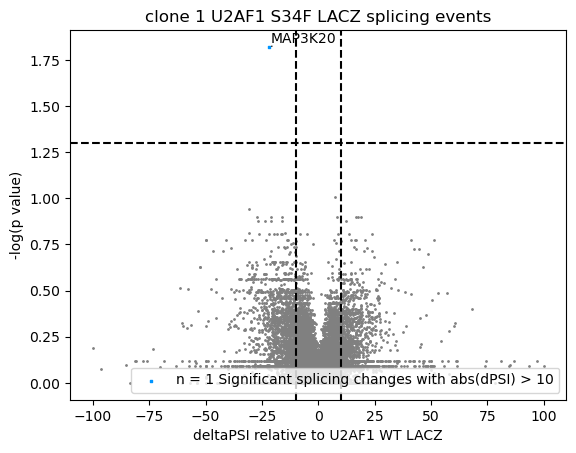

In [31]:
#u2af1 s34f lacz vs wt lacz

plt.scatter(x=filtered_c1s34flacz_jbPSI['delta_val'],y=filtered_c1s34flacz_jbPSI['neglogp'], s=1, color='gray')
plt.scatter(x=sig1['delta_val'],y=sig1['neglogp'],s=4,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig1))),
            color='#0095FF', marker = 's')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(1.3,color="black",linestyle="--")
plt.title('clone 1 U2AF1 S34F LACZ splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
# plt.ylim(0, 4) 
# plt.xlim(-60, 60)

texts1 = []
for i in range(len(sig1text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig1text.iloc[i].delta_val, y=sig1text.iloc[i].neglogp, s= sig1text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='lower right', facecolor="white")
# plt.savefig("Downloads/dpsi_volcano_s34flacz.pdf", format='pdf', transparent=True)

IndexError: list index out of range

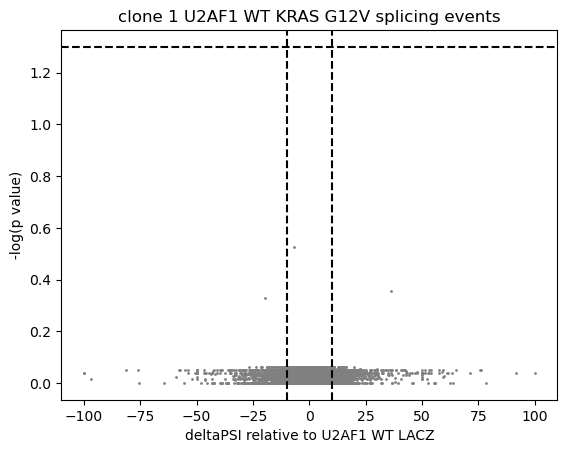

In [32]:
#u2af1 wt kras g12v vs wt lacz

plt.scatter(x=filtered_c1wtkv12_jbPSI['delta_val'],y=filtered_c1wtkv12_jbPSI['neglogp'], s=1, color='gray')
plt.scatter(x=sig2['delta_val'],y=sig2['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig2))),
            color='#FF2501', marker='^')

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(1.3,color="black",linestyle="--")
plt.title('clone 1 U2AF1 WT KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
# plt.ylim(0, 4) 
# plt.xlim(-60, 60)

texts1 = []
for i in range(len(sig2text)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig2text.iloc[i].delta_val, y=sig2text.iloc[i].neglogp, s= sig2text.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='lower right', facecolor="white")
# plt.savefig("Downloads/dpsi_volcano_wtkv12.pdf", format='pdf', transparent=True)

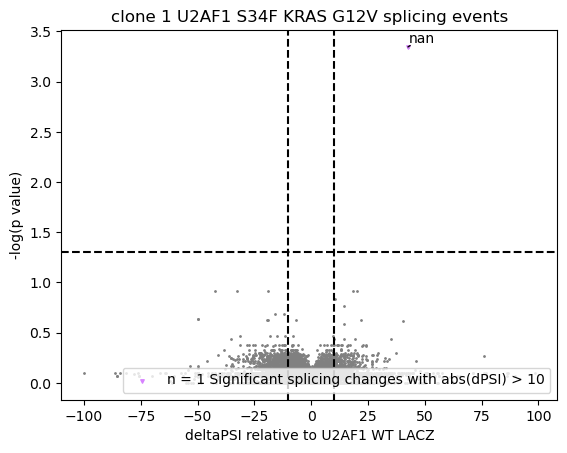

In [30]:
#u2af1 s34f kras g12v vs u2af1 wt lacz
#plot volcano plot with lines marking deltapsi 10 and sig p value

plt.scatter(x=filtered_c1s34fkv12_jbPSI['delta_val'],y=filtered_c1s34fkv12_jbPSI['neglogp'], s=1, color='gray')
plt.scatter(x=sig3['delta_val'],y=sig3['neglogp'],s=6,
            label=("n = %s Significant splicing changes with abs(dPSI) > 10" % (len(sig3))),
            color='#D783FF', marker="v")

plt.xlabel("deltaPSI relative to U2AF1 WT LACZ")
plt.ylabel("-log(p value)")
plt.axvline(-10,color="black",linestyle="--")
plt.axvline(10,color="black",linestyle="--")
plt.axhline(1.3,color="black",linestyle="--")
plt.title('clone 1 U2AF1 S34F KRAS G12V splicing events')
# plt.yticks(range(-1, 15))
# plt.xticks([-60, -50, -40, -30, -20, -10, 0 , 10, 20, 30, 40, 50, 60])
# plt.ylim(0, 4) 
# plt.xlim(-60, 60)

texts1 = []
for i in range(len(sig3)):
    #if sig2text.iloc[i].delta_val < 61:
    texts1.append(plt.text(x= sig3.iloc[i].delta_val, y=sig3.iloc[i].neglogp, s= sig3.iloc[i].GeneName))
    
adjust_text(texts1, arrowprops = dict(arrowstyle = '-', color = 'k'))

plt.legend(loc='lower right', facecolor="white")
# plt.savefig("Downloads/dpsi_volcano_s34fkv12.pdf", format='pdf', transparent=True)

In [7]:
#sort by deltaPSI, then keep the first entry (highest value absdeltaPSI)

#filter data frames by padj < 0.25
c1s34flacz_padj025 = filtered_c1s34flacz_jbPSI.loc[(filtered_c1s34flacz_jbPSI['corrected_pval'] < 0.25)]
c1wtkv12_padj025 = filtered_c1wtkv12_jbPSI.loc[(filtered_c1wtkv12_jbPSI['corrected_pval'] < 0.25)]
c1s34fkv12_padj025 = filtered_c1s34fkv12_jbPSI.loc[(filtered_c1s34fkv12_jbPSI['corrected_pval'] < 0.25)]

#take absolute value of dPSI
dflist = [c1s34flacz_padj025, c1wtkv12_padj025, c1s34fkv12_padj025]
for df in dflist:
    df['abs(dPSI)'] = abs(df['delta_val'])

#for duplciates, keep only highest deltapsi entry
#first sort by descending abspsi

c1s34flacz_padj025 = c1s34flacz_padj025.sort_values(['abs(dPSI)'], ascending=False)
c1wtkv12_padj025 = c1wtkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
c1s34fkv12_padj025 = c1s34fkv12_padj025.sort_values(['abs(dPSI)'], ascending=False)
    
#now, keep only the highest of a dup gene entry
c1s34flacz_unique = c1s34flacz_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
c1wtkv12_unique = c1wtkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)
c1s34fkv12_unique = c1s34fkv12_padj025.drop_duplicates(subset = ['GeneName'], keep = "first", inplace=False)

#drop transcripts without gene name
c1s34flacz_RNK = c1s34flacz_unique.dropna(subset=['GeneName'])
c1wtkv12_RNK = c1wtkv12_unique.dropna(subset=['GeneName'])
c1s34fkv12_RNK = c1s34fkv12_unique.dropna(subset=['GeneName'])

c1s34flacz_RNK

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3739/4022312710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_3739/4022312710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abs(dPSI)'] = abs(df['delta_val'])


,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)
24132,K,jcn_only_AA,ENSG00000187742.15,-52.56,0.001508,0.236574,SECISBP2,0.626033,52.56
27056,K,jcn_only_AA,ENSG00000122417.15,51.39,0.000286,0.168328,ODF2L,0.773844,51.39
15666,N,jcn_only_AA,ENSG00000077514.9,46.67,0.001388,0.236574,POLD3,0.626033,46.67
271,N,jcn_only_AA,ENSG00000154473.18,-42.31,0.000652,0.193110,BUB3,0.714195,42.31
8770,K,cassette,ENSG00000102038.15,-38.91,0.000625,0.184863,SMARCA1,0.733150,38.91
...,...,...,...,...,...,...,...,...,...
3267,K,cassette,ENSG00000214944.9,-5.88,0.001141,0.220383,ARHGEF28,0.656822,5.88
510,K,jcn_only_AA,ENSG00000084072.17,-5.84,0.001489,0.236574,PPIE,0.626033,5.84
1592,K,cassette,ENSG00000100796.17,-5.03,0.000243,0.157006,PPP4R3A,0.804084,5.03
6280,N,cassette,ENSG00000122359.18,4.53,0.001224,0.220383,ANXA11,0.656822,4.53


In [23]:
c1s34flacz_RNK

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)
24132,K,jcn_only_AA,ENSG00000187742.15,-52.56,0.001508,0.236574,SECISBP2,0.626033,52.56
27056,K,jcn_only_AA,ENSG00000122417.15,51.39,0.000286,0.168328,ODF2L,0.773844,51.39
15666,N,jcn_only_AA,ENSG00000077514.9,46.67,0.001388,0.236574,POLD3,0.626033,46.67
271,N,jcn_only_AA,ENSG00000154473.18,-42.31,0.000652,0.193110,BUB3,0.714195,42.31
8770,K,cassette,ENSG00000102038.15,-38.91,0.000625,0.184863,SMARCA1,0.733150,38.91
...,...,...,...,...,...,...,...,...,...
3267,K,cassette,ENSG00000214944.9,-5.88,0.001141,0.220383,ARHGEF28,0.656822,5.88
510,K,jcn_only_AA,ENSG00000084072.17,-5.84,0.001489,0.236574,PPIE,0.626033,5.84
1592,K,cassette,ENSG00000100796.17,-5.03,0.000243,0.157006,PPP4R3A,0.804084,5.03
6280,N,cassette,ENSG00000122359.18,4.53,0.001224,0.220383,ANXA11,0.656822,4.53


In [24]:
c1s34fkv12_RNK

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)
7304,N,jcn_only_AD,ENSG00000133028.12,40.30,0.000051,0.239159,SCO1,0.621313,40.30
28451,K,alternative_acceptor,ENSG00000091527.15,22.07,0.000242,0.237934,CDV3,0.623543,22.07
22895,N,jcn_only_AA,ENSG00000166200.15,-19.13,0.000048,0.122222,COPS2,0.912851,19.13
9863,K,alternative_acceptor,ENSG00000089159.16,-19.05,0.000331,0.237934,PXN,0.623543,19.05
24745,N,cassette,ENSG00000135341.18,14.62,0.000027,0.172456,MAP3K7,0.763322,14.62
534,K,jcn_only_AA,ENSG00000142864.14,-11.92,0.000277,0.205457,SERBP1,0.687279,11.92


In [25]:
c1wtkv12_RNK

,#Contains_Novel_or_Only_Known(Annotated)_Junctions,as_event_type,gene_name,delta_val,raw_pval,corrected_pval,GeneName,neglogp,abs(dPSI)


In [49]:
#now convert to RNK file

#first only keep gene name and delta cols
s34flacz_RNK = s34flacz_filtered.loc[:, s34flacz_filtered.columns.isin(['Gene Name', 'dPSI'])]
wtkv12_RNK = wtkv12_filtered.loc[:, wtkv12_filtered.columns.isin(['Gene Name', 'dPSI'])]
s34fkv12_RNK = s34fkv12_filtered.loc[:, s34fkv12_filtered.columns.isin(['Gene Name', 'dPSI'])]


# wtkv12_unique = wtkv12_unique.loc[:, wtkv12_unique.columns.isin(['Gene Name', 'delta_val'])]
# s34fkv12_unique = s34fkv12_unique.loc[:, s34fkv12_unique.columns.isin(['Gene Name', 'delta_val'])]

dflist = [s34flacz_RNK, wtkv12_RNK, s34fkv12_RNK]
for df in dflist:
# then rename gene name to #Gene and reorder columns
    df = df.rename(columns = {'Gene Name':'#Gene'}, inplace = True)
#     df = df.reindex(column_order, axis=1)

s34flacz_RNK.head(3)

/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1087/2372905747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'Gene Name':'#Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1087/2372905747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = df.rename(columns = {'Gene Name':'#Gene'}, inplace = True)
/var/folders/hm/zh04v3sn0zl8ry6c2v325znh0000gp/T/ipykernel_1087/2372905747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,dPSI,#Gene
1,0.037242,PPIA
2,0.037242,PPIA
3,0.026893,S100A2
